['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']
[4.00226859e-01 3.87649687e-02 2.91799707e-04 8.00665779e-02
 2.23648743e-01 8.91560954e-03 1.19387740e-01 1.28697701e-01]


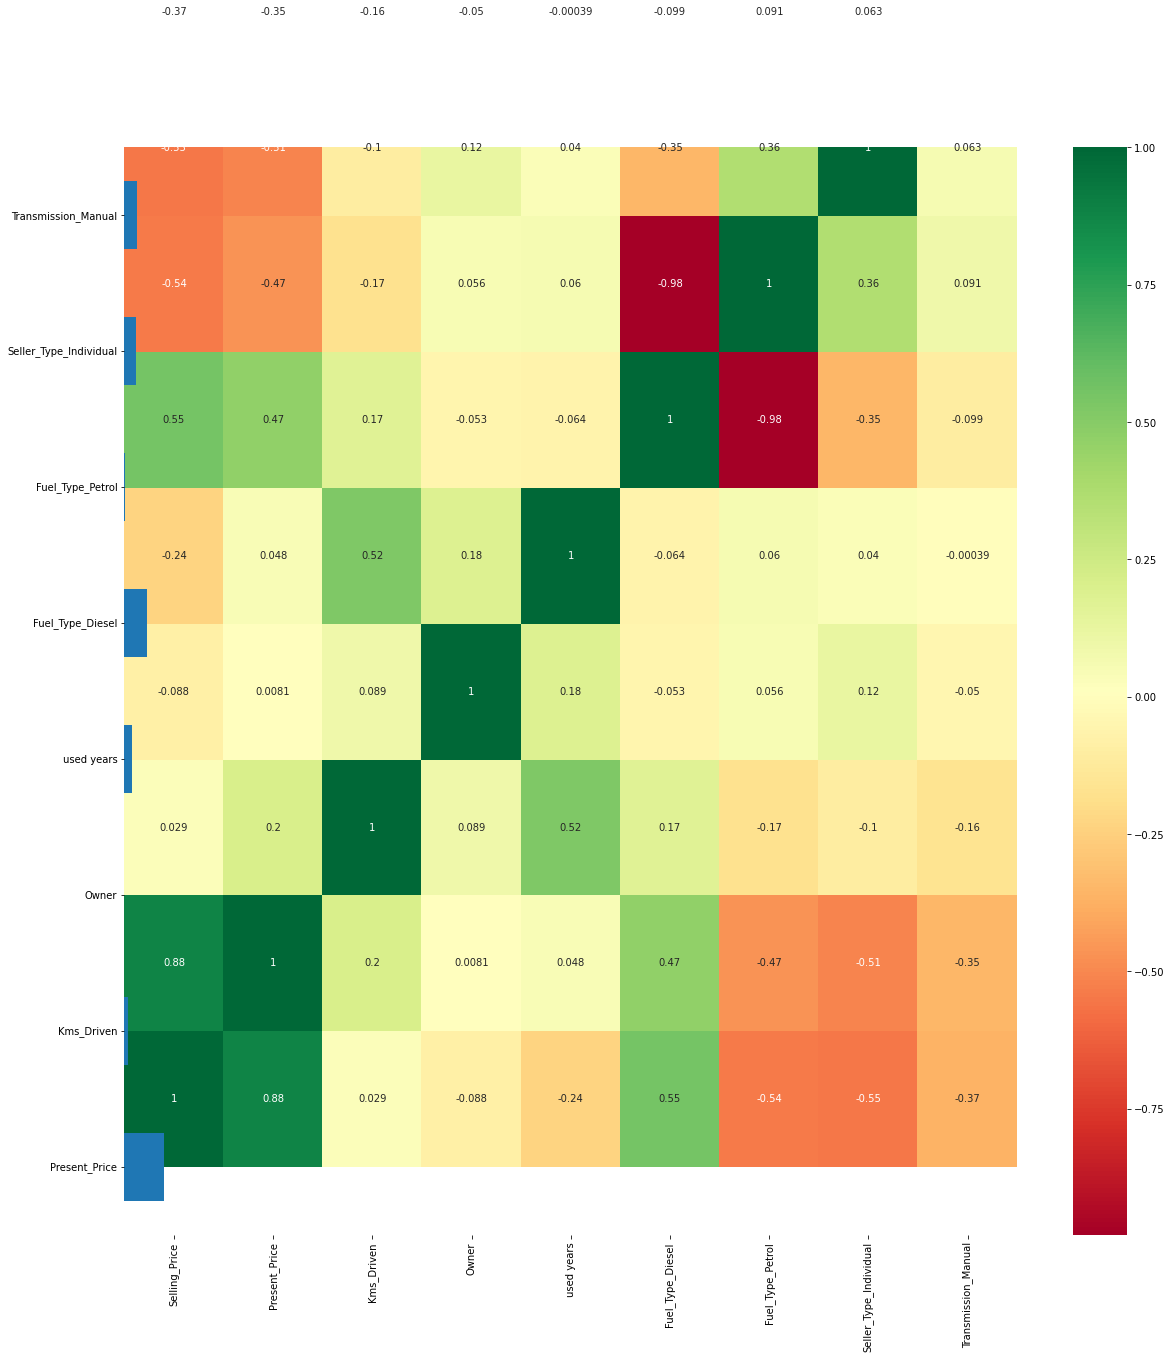

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, mi

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


MAE: 0.5737231147541016
MSE: 1.3648701061098394
RMSE: 1.168276553779044


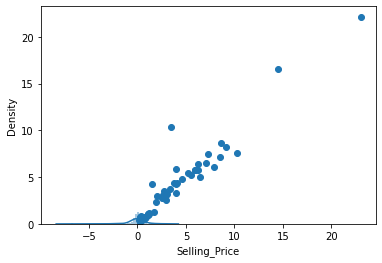

In [66]:
import pandas as pd
ds = pd.read_csv('car data.csv')
ds.head()
ds.shape
print(ds['Seller_Type'].unique())
print(ds['Transmission'].unique())
print(ds['Owner'].unique())
print(ds['Fuel_Type'].unique())
ds.isnull().sum()
ds.describe()
ds.columns
f_ds = ds[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
f_ds.head()
f_ds['present year'] = 2022
f_ds.head()
f_ds['used years'] = f_ds['present year'] - f_ds['Year']
f_ds.head()
f_ds.drop(['Year'],axis=1,inplace= True )
f_ds.head()
f_ds.drop(['present year'],axis=1,inplace= True )
f_ds.head()
f_ds = pd.get_dummies(f_ds,drop_first=True)
f_ds.head()
f_ds.corr()
import seaborn as vs
vs.pairplot(f_ds)
import matplotlib.pyplot as plt
%matplotlib inline
opt = f_ds.corr()
top_cor_feature = opt.index
plt.figure(figsize=(20,20))
k=vs.heatmap(f_ds[top_cor_feature].corr(),annot=True,cmap='RdYlGn')
## independent feature
X=f_ds.iloc[:,1:]
## dependent feature
Y=f_ds.iloc[:,0]
X.head()
Y.head()
## important features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)
print(model.feature_importances_)
##plotting graph with important featues
imp_fea = pd.Series(model.feature_importances_,index = X.columns)
imp_fea.plot(kind = 'barh')
plt.show()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
rf_rdm = RandomForestRegressor()
## Hyperparameters
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100,stop = 1200 , num =12)]
print(n_estimators)
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
from sklearn.model_selection import RandomizedSearchCV
rndn_grid  = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(rndn_grid)
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rndn_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,Y_train)
predictions = rf_random.predict(X_test)
predictions
vs.distplot(Y_test-predictions)
plt.scatter(Y_test,predictions)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
import pickle
# open a file, where you ant to store the data
file = open('randomfrst.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)
